In [16]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,LogisticRegression
from sklearn.decomposition import TruncatedSVD, KernelPCA, PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,BaggingRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos
from sklearn.metrics import hamming_loss
from skimage.exposure import equalize_hist,equalize_adapthist

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save
from os import listdir, getcwd
from os.path import isfile, join

In [17]:
prep_ = lambda i:cap(i)
def prep(a):
  return np.array(map(prep_single,a))

percent = lambda x:"%2.1f%%"%(x*100)

prep_single = lambda xs:map(prep_,xs)

cap = lambda p: 0 if p < 0.5 else 1

y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
TO_RADIANS = pi/180

def computeAvailiableFiles():
  global onlyfiles
  onlyfiles = [f for f in listdir(getcwd()) if isfile(join(getcwd(), f))]

computeAvailiableFiles()
print "Precomputed configurations:"
for f in onlyfiles:
  print " ",f

Precomputed configurations:
  histsSize24_stats_nBlocks125_bSize26_divs_5_5_5.npy
  GridSearch_ovr_ks_kernel_poly_n_splits10_lts_minmax_ltsavg_ltsstd.npy
  direct_cut_histsSize0smoothed_stats_nBlocks27_bSize6_divs_3_3_3.npy
  GridSearch_ovo_uniFalse_ks_kernel_rbf_n_splits10_rs0_trs1_lts_minmax_ltsavg_ltsstd.npy
  many_hists144_space35_divs_6_4_6.npy
  many_hists_histsSize0smoothed_stats_nBlocks144_bSize6_divs_6_4_6.npy
  histsSize14_stats_nBlocks512_bSize16_divs_8_8_8.npy
  histsSize19_stats_nBlocks60_bSize21_divs_5_3_4.npy
  plot_gpr_noisy_targets.ipynb
  histsSize19_stats_nBlocks1000_bSize21_divs_10_10_10.npy
  histsSize49_stats_nBlocks27_bSize51_divs_3_3_3.npy
  histsSize19_stats_nBlocks343_bSize21_divs_7_7_7.npy
  histsSize69_stats_nBlocks294_bSize77_divs_7_6_7.npy
  direct_cut_histsSize39smoothed_stats_nBlocks27_bSize39_divs_3_3_3.npy
  spherical_every2.npy
  many_hists_histsSize14smoothed_stats_nBlocks9_bSize16_divs_3_1_3.npy
  show-interactive.py
  many_hists_histsSize69smoothed

In [18]:
space = 15 # 35,50,70,100,150
hSize = space-1
bins = np.linspace(1,1700,space)
#bins = np.linspace(0,1,space)
sbins = bins[:-1]+1800/space/2

r_division = 8
theta_division = 8
phi_division = 8
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin
Ncomps = 40

ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division
fnameSpherical = "spherical_every2.npy"
xSpherical = np.load(fnameSpherical)
computeAvailiableFiles()

bSize = hSize+2 # bsize means blockSize
ds = nBlocks*bSize # Ncomps # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: np.array(range(idxHist(i)+hSize,idxHist(i)+hSize+many))

blockNr2Pos = np.zeros((nBlocks,3))

verboseIdx = lambda i: ["Block #",i/bSize," at",blockNr2Pos[i/bSize],"isHist:",i%bSize<hSize," and bin",i%bSize," or stat",i%bSize-hSize]

print "Number of Blocks:",nBlocks
print "Size of Histograms:",hSize
print "Numbers per Block:",bSize
print "Dimensions: ca.",ds

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

fromtoSpherical = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

from skimage.filters import sobel
# "xTransformed.npy"
fname = "histsSize%s_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "output/%s" % fname[:-4]


def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    iD = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > iD+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        iD = i
      
      #n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      #filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      #Xtotal,Ytotal,Ztotal = (176,208,176)
      #data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      #data = data[35:130,40:150,10:100]

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      i0=0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        i1=0
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          i2=0
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            
            blockNr2Pos[hCount] = [i0,i1,i2]
            
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            #cut = equalize_hist(cut)
            #sb = sobel(np.max(cut,axis=2))
            h=np.histogram(cut.ravel(),bins=bins)[0]
            xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = h
            #k0,k1,k2 = cut.shape
            #pos = np.arange(k0).reshape((k0,1,1)) + np.arange(k1).reshape((1,k1,1)) + np.arange(k2).reshape((1,1,k2))
            #pos2 = pos*pos
            avg = np.average(cut)
            std = np.std(cut)
            xa[i,idxsFor(hCount,2)] = [avg,std]
            #xa[i,idxsFor(hCount,2)+2] = [np.sum(pos*cut),np.sum(pos2*cut)]
            #xa[i,idxsFor(hCount,2)+4] = [np.average(sb),np.std(sb)/np.average(sb)]
            hCount = hCount + 1
            i2 = i2+1
          i1 = i1+1
        i0 = i0+1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if False or not fname in onlyfiles:
  if True:
    loadAndPreprocess()
  else:
    xFlat = np.load("xFlat.npy")
    print "Flat structure:",xFlat.shape
    kpca = KernelPCA(kernel="rbf",
                     degree=2,coef0=1,
                     gamma=1e-10,random_state=0,
                     n_components=Ncomps,fit_inverse_transform=True)
    kpca.fit(xFlat[:n_max,:])
    xtransformed = kpca.transform(xFlat)
    np.save("xTransformed.npy",xtransformed)
    print "Saved into xTransformed.npy"
    print kpca.lambdas_[:15],"...",kpca.lambdas_[-3:]
    plt.plot(kpca.lambdas_)
    plt.title("Eigenalues in size")
    plt.show()

xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

print "Example:",xa[0,:20],"..."

Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
Example: [   0.            0.           37.           28.          462.            3.
   45.          143.           64.           93.          268.            7.
    0.            0.          842.89913043  313.06656925    0.            0.
    1.            0.        ] ...


In [19]:
if False:
  i = 413
  for it,theta in enumerate(np.linspace(0,xSpherical[i].shape[1]-1,6)):
    print theta,("<","="*10) if 3<=it<5 else ""
    c = np.array(xSpherical[i,:,theta,:],copy=True)
    plt.imshow(c, cmap="gray", origin="lower")
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b if not (a2 is 1 and a3 is 0)]
Ntypes = len(types)

def get_by(t,ys):
    idxs = range(0,len(ys))
    return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = np.array([get_by(t,y) for t in types])
ratios = [float(len(i))/n_max for i in typeIdxs]

def show_diff_for(name,es1,es2,total):
  print es1,es2
  es = map(lambda x,y:x-y,es1,es2)
  abses = map(abs,es)
  print name,"contains",sum(abses)/2,"samples of total",total,": %0.2f%%" % (100*float(sum(abses))/total)
  for i in range(0,len(es1)):
      tp = ((100*float(es[i])/total),types[i],es[i])
      print "  %0.2f%%: %s with samples: #%s" % tp

def show_diff(name,es1,es2):
  es1 = map(len,es1)
  es2 = map(len,es2)
  show_diff_for(name,es1,es2,total=sum(es1))

def show_for(name,es):
  es1 = map(len,es)
  show_diff_for(name,es1,[0]*len(es1),sum(es1))

# The procedure will add so many nonClass samples to the split, until at least 30% don't belong to any class
# for None, this doSplit returns a tuple of elements.
# for the other arguments, doSplit list of such tuples
def doSplit(test_size=0.25,rs=1,show=False):
  
  def mkTuple(ttr,tts,lastIsNil,classes):
    ys = lambda i: [classes[i] if i < 2 else -1]
    return (ttr,tts,
             np.vstack([x[idxs] for idxs in ttr]),
             np.vstack([x[idxs] for idxs in tts]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(ttr)]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(tts)]) )
  
  typeIdxsTR = []
  typeIdxsTS = []
  for i in range(0,Ntypes):
      atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=test_size,random_state=rs)
      typeIdxsTR.append(atr)
      typeIdxsTS.append(ats)
  typeIdxsTR = np.array(typeIdxsTR)
  typeIdxsTS = np.array(typeIdxsTS)
  # gender: 1 = female, 0 = male
  # age: 1 = young, 0 = old
  # health: 1 = healthy, 0 = sick
  if show:
    show_for("public Training",typeIdxs)
    show_for("our Training",typeIdxsTR)
    show_for("our Test",typeIdxsTS)
  return mkTuple(typeIdxsTR,typeIdxsTS,False,None)

# [0,1,1] => [0,0,0,1,0,0,0,0]
def binary2monadic(y):
  ys = np.zeros((len(y),1))
  for i,yi in enumerate(y):
    # ys[i,int(yi[0]*4+yi[1]*2+yi[2])] = 1
    ys[i] = int(list(types).index(list(yi)))
  return ys

convertInt = lambda i:types[i]
#convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])

def monadic2binary(y):
  #return np.array([convertInt(list(yi).index(1)) for yi in y])
  return np.array([convertInt(yi) for yi in y])

def continousMonadic2binary(y):
  ys = np.zeros((len(y),3))
  for i,yi in enumerate(y):
    ys[i] = convertInt(np.argmax(yi))
  return ys

print "Class representation"
r = map(lambda x:int(x*100),ratios)
for i in range(0,6):
  print types[i],("%2.1f%%"%r[i]),(r[i]*"=")

Class representation
[0, 0, 0] 10.0% ==========
[0, 0, 1] 6.0% ======
[0, 1, 1] 22.0% ======================
[1, 0, 0] 14.0% ==============
[1, 0, 1] 17.0% =================
[1, 1, 1] 29.0% =============================


In [21]:
if False:
  doSplit(show=True,test_size=0.3,rs=1)

In [22]:
def visualize(labelName,y_pred,model,do,prefix,mcl):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"
  if mcl in ["ovr","ovo"]:
    return
  if do[0] is "a":
    plt.plot(model.estimator_errors_)
    plt.title("Estimator errors")
    plt.savefig(prefix+"_"+str(labelName)+".png")
    plt.show()
  if do is "rf":
    print "Out-of-bag Score: %s" % model.oob_score_
    a = model.feature_importances_
    ai = np.argsort(-a)
    print "Important features: %s..." % ai[:6]
    for i in ai[:6]:
      print verboseIdx(i)
    plt.plot(a[ai])
    plt.show()
    print "\n"
  if do is "ks":
    print "Using #",len(model.support_),"# support vectors"
  if do is "aks":
    print "Using average #",np.average([len(m.support_) for m in model.estimators_]),"# support vectors"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

def applyClassification(model,label,preprocess=None,uni=False,split=None,mcl=None):
  (_,_,xtr,xts,ytr,yts) = split
  if label is None:
    get_label = lambda ys: ys
  else:
    get_label = lambda ys: ys[:,label]
  
  # processing line
  xtr1 = np.array(xtr,copy=True)
  xtrAvg = np.average(xtr,axis=0)
  xtrStdDev = np.std(xtr,axis=0)
  xtr1 = (xtr1 - xtrAvg)/(xtrStdDev+0.00001)
  xtr1 = preprocess.fit_transform(xtr1) if preprocess is not None else xtr1
  ytr_pred = model.fit(xtr1,get_label(ytr)).predict_proba(xtr1) if uni and "predict_proba" in dir(model) else model.fit(xtr1,get_label(ytr)).predict(xtr1)
  
  def predict(xData):
    xData2 = np.array(xData,copy=True)
    xData2 = (xData - xtrAvg)/(xtrStdDev+0.00001)
    xData3 = preprocess.transform(xData2) if preprocess is not None else xData2
    yPred = model.predict_proba(xData3) if uni and "predict_proba" in dir(model) else model.predict(xData3)
    return yPred
  
  yts_pred = predict(xts)
  y_t_pred = predict(x_t)
  
  if not uni:
    #y_t_pp = prep_single(y_t_pred)
    yts_pp = prep_single(yts_pred)
    ytr_pp = prep_single(ytr_pred)

    trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(ytr),ytr_pp)))
    tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(yts),yts_pp)))
    ltr = 100*hamming_loss(get_label(ytr),ytr_pp)
    lts = 100*hamming_loss(get_label(yts),yts_pp)

    print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
  else:
    ltr,lts = (0,0)
    
  return model,ltr,lts,ytr_pred,yts_pred,y_t_pred,predict

import random

def applyClassificationSeparated(classf,mcl,preprocess,uni,
                                 trs,test_size,n_splits):
  prefix = classf[0]
  # TODO: copy output to file
  
  doPrep = lambda xs: prep(xs)
  
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  results = []
  
  #using a random_state for the test case splitting. it needs to be different for each split, thus the index of
  # the split is added to a factor of the trs. for different values of trs (0,1,2,...) it will produce very different splits
  splits = [doSplit(test_size=test_size,rs=i+30*trs) for i in range(0,n_splits)]
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  
  for i,splitO in enumerate(splits):
    print "============== SPLIT # %s # ================" % i
    
    splitss = [splitO]
    
    subClassResults = []
    for j,split in enumerate(splitss):
      _,_,_,_,ytr,yts = split
      if uni:
        split2 = (split[0],split[1],split[2],split[3],binary2monadic(ytr),binary2monadic(yts))
        models,ltr,lts,ytr_pred_real_m,yts_pred_real_m,y_t_pred_real_m,predictor = applyClassification(classf[1],
                                                                                   label=None,preprocess=preprocess,
                                                                                   uni=uni,split=split2,mcl=mcl)
        ytr_pred_real = continousMonadic2binary(ytr_pred_real_m)
        yts_pred_real = continousMonadic2binary(yts_pred_real_m)
        y_t_pred_real = continousMonadic2binary(y_t_pred_real_m)
      else:
        model1,ltr1,lts1,ytr_pred1,yts_pred1,y_t_pred1,prdt1 = applyClassification(classf[1],0,preprocess=preprocess,split=split,mcl=mcl)
        model2,ltr2,lts2,ytr_pred2,yts_pred2,y_t_pred2,prdt2 = applyClassification(classf[1],1,preprocess=preprocess,split=split,mcl=mcl)
        model3,ltr3,lts3,ytr_pred3,yts_pred3,y_t_pred3,prdt3 = applyClassification(classf[1],2,preprocess=preprocess,split=split,mcl=mcl)
        
        ytr_pred_real = np.array([ytr_pred1,ytr_pred2,ytr_pred3]).transpose()
        yts_pred_real = np.array([yts_pred1,yts_pred2,yts_pred3]).transpose()
        y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()
        
        def predictor(xData):
          lb1 = prdt1(xData)
          lb2 = prdt2(xData)
          lb3 = prdt3(xData)
          ys = np.array([lb1,lb2,lb3]).transpose()
          return ys
        
        models = [model1,model2,model3]
      
      y_pred_T = doPrep(y_t_pred_real)
      y_pred_tr = doPrep(ytr_pred_real)
      y_pred_ts = doPrep(yts_pred_real)
      y_t_pred = y_pred_T
      ltr = 100*hamming_loss(ytr,y_pred_tr)
      lts = 100*hamming_loss(yts,y_pred_ts)
    
    print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)

    results.append([y_t_pred,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models,predictor])
    
  return results

class FT:
  
  def __init__(self):
    pass
  
  def fit_transform(self,a):
    return np.concatenate((a,np.abs(np.fft.rfft(a,norm="ortho",axis=1))),axis=1)
  
  def transform(self,a):
    return self.fit_transform(a)

In [23]:
def doStuff(do="rf",al=15,comps=n_max-1,n_est=120,k1="rbf",
            max_depth=7,msplit=10,feats=0.3,samps=0.3,rs=0,nn=20,weights="distance",p=2,
            kpcaK="rbf",preprocess=None,uni=True,mcl=None,test_size=0.25,n_splits=5,
            lr=1.0,trs=0,solver="liblinear",penalty="l2",bst=None,
            kernel="rbf",coef0=1,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5,msp=15):
  
  print "Number of Blocks:",nBlocks
  print "Size of Histograms:",hSize
  print "Numbers per Block:",bSize
  print "Dimensions: ca.",ds
  
  if do is "gbc":
    prefix = "%s_GradientBoostingClassifier_n%s_lr%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,lr,f,msp,max_depth,rs)
    model = GradientBoostingClassifier(n_estimators=n_est,max_features=f,
                                       learning_rate=lr,loss='deviance',
                                       min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "lr":
    prefix = "%s_LogisticRegression_C%s_solver_%s_penalty_%s_rs%s_" %(name,C,solver,penalty,rs)
    model = LogisticRegression(C=C,solver=solver,penalty=penalty,dual=False,random_state=rs,n_jobs=1)
  elif do is "rf":
    prefix = "%s_RandomForest_n%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,f,msp,max_depth,rs)
    model = RandomForestRegressor(n_est,max_features=f,oob_score=True,n_jobs=-1,
                                   min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "al":
    prefix = "%s_AdaLasso_Alpha%s_n_est%s_rs%s"%(name,al,n_est,rs)
    model = AdaBoostRegressor(Lasso(alpha=al),n_estimators=n_est,random_state=rs)
  elif do is "ks":
    prefix = "%s_kSVM_kernel%s_C%s_def%s_coef0_%s_rs%s"%(name,kernel,C,deg,coef0,rs)
    model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0,random_state=rs,probability=True)
  elif do is "aks":
    prefix = "%s_Ada_n_est%s_rs%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,n_est,rs,kernel,C,deg,coef0)
    model = AdaBoostRegressor(SVC(kernel=kernel,C=C,degree=deg,coef0=coef0),n_estimators=n_est,random_state=rs)
  elif do is "nn":
    prefix = "%s_NN_nn%s_weights_%s_p%s"%(name,nn,weights,p)
    model = KNeighborsRegressor(n_neighbors=nn,weights=weights,p=p)
  
  if bst is "ada":
    prefix = prefix + "_ADA"
    model = AdaBoostClassifier(model,n_estimators=n_est,random_state=rs)
  if bst is "bag":
    prefix = prefix + "_ADA"
    model = BaggingClassifier(model,n_estimators=n_est,max_features=f,n_jobs=1,random_state=rs)
    
  if mcl is "ovo":
    #uni = True
    #print "Setting uni to True because of mcl == ovo"
    prefix = prefix + "_OVO"
    model = OneVsOneClassifier(model,n_jobs=1 if do is "lr" else -1)
  if mcl is "ovr":
    uni = True
    print "Setting uni to True because of mcl == ovr"
    prefix = prefix + "_OVR"
    model = OneVsRestClassifier(model,n_jobs=1)
  
  if preprocess is "kpca":
    prefix="%s_KPCA_%s"%(prefix,kernel)
    preprocess = KernelPCA(kernel=kpcaK)
  if preprocess is "ft":
    prefix="%s_FT"%(prefix)
    preprocess = FT()
  elif preprocess is "svd":
    prefix="%s_SVD_n%s"%(prefix,n_comps)
    preprocess = TruncatedSVD(n_components=n_comps)
  else:
    preprocess = None
  
  if uni:
    prefix = prefix + "_UNIFIED"
    
  prefix = "%s_TEST_SIZE%s_n%s_trs%s" % (prefix,test_size,n_splits,trs)
  
  # results = [(y_pred_T,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models),...]
  results = applyClassificationSeparated((prefix,model),preprocess=preprocess,uni=uni,mcl=mcl,
                                                                          test_size=test_size,trs=trs,
                                                                          n_splits=n_splits)
  # compute average predictions:
  yt_real = np.average([r[1][2] for r in results],axis=0)
  
  ltravg = np.average([r[3] for r in results],axis=0)
  ltsavg = np.average([r[4] for r in results],axis=0)
  ltrstd = np.std([r[3] for r in results],axis=0)*n_splits/(n_splits-1) # empirical std, estimation
  ltsstd = np.std([r[4] for r in results],axis=0)*n_splits/(n_splits-1)
  
  y_pred_T = prep(yt_real)

  print "\n### ltr %2.1f%% (+/- %2.2f) | ===== lts %2.1f%% (+/- %2.2f) ==== ###\n" % (ltravg,ltrstd,ltsavg,ltsstd)
  
  prefix = "%s_ltsavg%.3f_ltsstd%.3f"%(prefix,ltsavg/100,ltsstd/100)
  
  models = results[-1][5]
  
  if uni:
    models = [models,models,models]
  visualize("Gender",y_pred_T[:,0],models[0],prefix=prefix,do=do,mcl=mcl)
  visualize("Age   ",y_pred_T[:,1],models[1],prefix=prefix,do=do,mcl=mcl)
  visualize("Health",y_pred_T[:,2],models[2],prefix=prefix,do=do,mcl=mcl)
  
  if do is "ks" and mcl is not None and bst is None:
    nsp = np.array([m.n_support_ for s in results for m in (s[5].estimators_ if uni else [k for i in s[5] for k in i.estimators_])])
    print "# Support Vectors: %s" % nsp.ravel()
    
  # Plot 3D:
  fig = plt.figure(figsize=(10,5))
  
  ax = fig.add_subplot(221, projection='3d')
  ns = lambda x,n: np.random.random((n))*0.35
  xs = y[:,0]+ns(0,n_max)
  ax.scatter(xs, y[:,1]+ns(0,n_max), y[:,2]+ns(0,n_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Training distribution")
  ax.view_init(azim=20)

  ax = fig.add_subplot(223, projection='3d')
  xs = yt_real[:,0]
  ax.scatter(xs, yt_real[:,1]+ns(0,n_test_max), yt_real[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Public Test predictions")
  ax.view_init(azim=20)

  ax = fig.add_subplot(224, projection='3d')
  xs = y_pred_T[:,0]+ns(0,n_test_max)
  ax.scatter(xs, y_pred_T[:,1]+ns(0,n_test_max), y_pred_T[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  ax.set_title("Public Test finalized")
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_T,prefix)
  
  result = {
    "res":results,
    "ltrs":[r[3] for r in results],
    "ltss":[r[4] for r in results],
    "ltsavg":ltsavg,
    "ltsstd":ltsstd
  }
  return result

Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
### Prediction with ###
   output/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8_kSVM_kernelpoly_C5.0_def2_coef0_1_rs0_OVO_TEST_SIZE0.2_n10_trs1 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
============== SPLIT # 0 # ================
|   220    /      0    |    53   /       5    |    0.0%     |     8.6%     |
|   220    /      0    |    56   /       2    |    0.0%     |     3.4%     |
|   220    /      0    |    49   /       9    |    0.0%     |     15.5%     |
|                     Total                   |    0.0%     | >>  9.2%  << |
============== SPLIT # 1 # ================
|   220    /      0    |    50   /       8    |    0.0%     |     13.8%     |
|   220    /      0    |    54   /       4    |    0.0%     |     6.9%     |
|   220    /      0    |    49   /       9    |    0.0% 

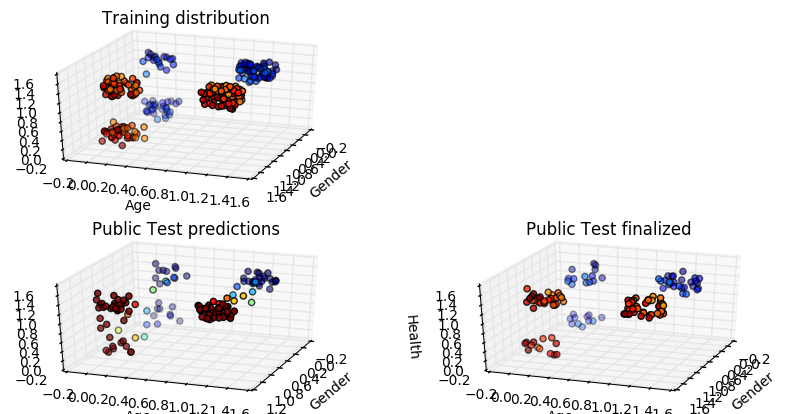

Saved predictions into output/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8_kSVM_kernelpoly_C5.0_def2_coef0_1_rs0_OVO_TEST_SIZE0.2_n10_trs1_ltsavg0.111_ltsstd0.013.csv


In [24]:
result = doStuff(
  preprocess="none",n_comps=25,kpcaK="poly",
  #do = "nn",nn=15,weights="distance",p=1,
  #uni=False,do = "aks",n_est=25,kernel="rbf",gamma=1e6,coef0=1,deg=2,k1="poly",C=1e20,
  ##do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=3,k1="poly",C=1e3,
  #uni = False, mcl="ovo", do = "gbc",n_est=200,f=0.1,msp=3,max_depth=2,rs=1,
  
  #uni=False,bst="bag",mcl="ovo",do="lr",C=1e5,solver="liblinear",rs=0,penalty="l2",n_est=70,
  
  #uni = False, mcl="ovr", do = "lr",C=1e2,solver="liblinear",rs=1,penalty="l2",   # good, okay... not that reliable
  #too slows... don't try... #uni = True, mcl="ovo", do = "lr",C=1e120,solver="liblinear",rs=0,penalty="l2",
  #uni = False, mcl="ovo", do = "lr",C=1e-1,solver="liblinear",rs=0,penalty="l2",
     # okay, seems to overfit the score though. be careful. it has high variance on public score!
    
  #uni = False, mcl="ovr", do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=2,k1="poly",C=1e20,rs=0,    # good
  #uni = True, mcl="ovr", do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=3,k1="poly",C=1e20,rs=0,    # good
  uni = False, mcl="ovo", do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=2,C=5e0,rs=0,     # oooh! stable, 13% public
  
  #uni = False,bst="bag",n_est=50,f=0.3,mcl="ovo",do="ks",kernel="poly",gamma=0.01/2,coef0=1,deg=2,C=1e2,rs=0,     # oooh! stable, 13% public
  
  # interesting! with higher number of blocks it gets even better!
  # space = 20, divs 8,8,8
  #uni = False, mcl="ovo", do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=2,C=5e2,rs=0, # oooh! somewhat stable
  # 11% public, sometimes 13%
  
  #uni = True, mcl="ovo", do = "ks",kernel="poly",gamma=0.01/2,coef0=1,deg=3,k1="poly",C=1e105,rs=0,   # unfit...
    
  #do = "al",n_est=50,al=1e20,
  #do = "rf",n_est=50,f=0.3,msp=3,max_depth=2,rs=1,                                # hm...
  #uni = False, mcl="ovr",# mcl="ovo"
  test_size=0.2,n_splits=10,trs=1,
  msplit=70)

In [11]:
# DONE: Results in the file

from itertools import product
import multiprocessing as mp
from joblib import Parallel,delayed
import time
# do grid search
# polynomial kernel: C, deg, coef0, test_size
# searched over: params = np.logspace(-15,35,10), [1,2,3], [0,1], [0.2,0.25,0.3]

# polynomial kernel: C, deg, coef0, test_size
#params = np.logspace(-15,35,10), [1,2,3], [0,1], [0.2,0.25,0.3]

# rbf kernel: gamma, C
params = np.logspace(-15,35,15), np.logspace(-15,35,15)

xs = list(product(*params))
print "====================== START ====================== "
print "Combinations:",len(xs),",",xs[:5],"..."

def trySolution(t):
  gamma,C = t
  results = doStuff(uni=False,mcl="ovo",do="ks",
                    kernel="rbf",gamma=gamma,C=C,rs=0,trs=1,
                    test_size=0.2,n_splits=10)
  return list(t)+[np.min(results["ltss"]),np.max(results["ltss"]),results["ltsavg"],results["ltsstd"]]

def test(t):
  gamma,C = t
  print t
  return list(t)

#results = Parallel(n_jobs=-1)(delayed(trySolution)(x) for x in xs)
#np.save("GridSearch_ovo_uniFalse_ks_kernel_rbf_n_splits10_rs0_trs1_test_size0.2_lts_minmax_ltsavg_ltsstd",np.array(results))

print "================ FIN ======================"
print "Saved results"

====================== START ====================== 
Combinations: 225 , [(1.0000000000000001e-15, 1.0000000000000001e-15), (1.0000000000000001e-15, 3.7275937203149379e-12), (1.0000000000000001e-15, 1.3894954943731388e-08), (1.0000000000000001e-15, 5.1794746792312233e-05), (1.0000000000000001e-15, 0.19306977288832536)] ...
================ FIN ======================
Saved results


===================================================================================================================
### Next steps
* take a look at the empirical distribution (Anteile) of the predicted classes.
   All the real-valued predictions can be plotted in a 3D plot :)
   If there are too few (many) predictions in a class (by comparision to Anteile in training set),
   then move the closest other samples to our class (furthest of current samples to another class).
* Focus on Amygdala and Hippocampus for classification
* Fit a classifier for each of the eigth classes
* Make three calssifiers. one for big, one for small, one for big/small
* Use Age and Health for improving Gender Prediction, DONE, no improvement
* Use image processing features
* pie output to file and save it as well
* Wellenfeldinteraktionen (FT and Sum)
* use neural networks for spatial information
* male => more amount of grey matter
* Show the most-frequently used decision attributes for RandomForest, DONE

## TODO: class [0,0,1] is underrepresented... increase it!
* TODO: Visualize important places in spherical coordinates.
* Then goo deeper in that part of the brain :)

In [ ]:
print types
print binary2monadic(types)
r = np.random.random((1,8))
print r
print continousMonadic2binary(r)

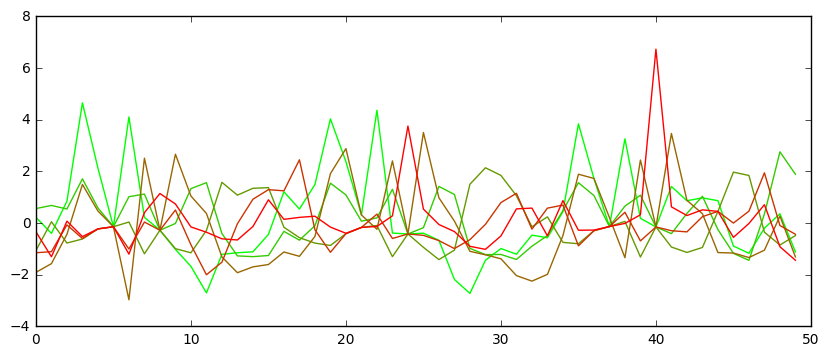

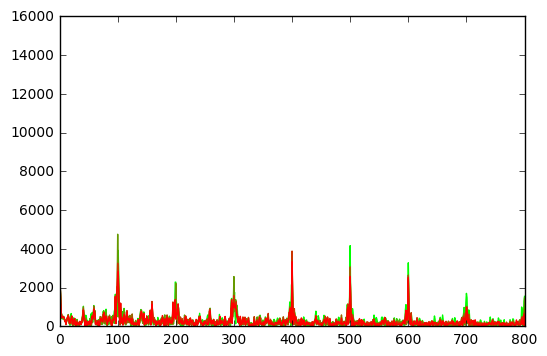

In [41]:

xAvg = np.average(x,axis=0)
xStdDev = np.std(x,axis=0)

x2 = (x-xAvg)/(xStdDev+0.000001)

def ft(a):
  return np.fft.rfft(a,norm="ortho")

def ift(a):
  return np.fft.irfft(a,norm="ortho")

fig = plt.figure(figsize=(10,4))

for j,idxs in enumerate(typeIdxs):
  for i in idxs[:1]:
    plt.plot(x2[i,1000:1050],c=[j/5.0,(1-j/5.0),0])
plt.show()

#print np.abs(ft(x[0,:]))
#print ift(np.abs(ft(x[0,:])))

for j,idxs in enumerate(typeIdxs):
  for i in idxs[:1]:
    plt.plot(np.abs(ft(x[i,:])),c=[j/5.0,(1-j/5.0),0])
plt.show()

In [95]:
from skimage.exposure import equalize_hist
from skimage.transform import downscale_local_mean
from skimage.filters import gaussian

xSmaller = downscale_local_mean(xSpherical,factors=(1,1,2,3),cval=0.0)
print "downscaled..."
import operator
import functools

for i in xrange(len(xSmaller)):
  xSmaller[i] = gaussian(xSmaller[i],sigma=0.5)
print "Original Structure",xSpherical.shape
print "Smaller Structure",xSmaller.shape
print "n_features:",functools.reduce(operator.mul,xSmaller.shape[1:])
xFlat = xSmaller.reshape((n_max+n_test_max,-1))
np.save("xFlat.npy",xFlat)

downscaled...
Original Structure (416, 41, 76, 181)
Smaller Structure (416, 41, 38, 61)
n_features: 95038


0.0


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


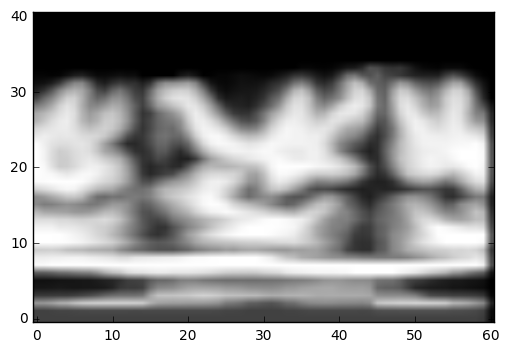

7.4


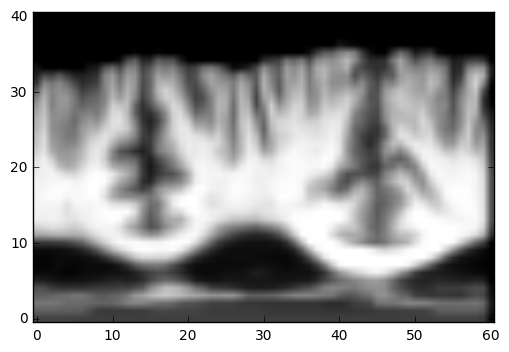

14.8


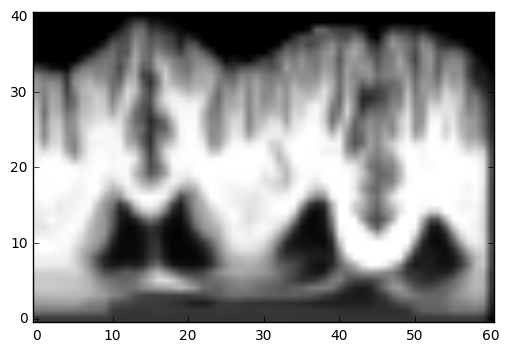

22.2


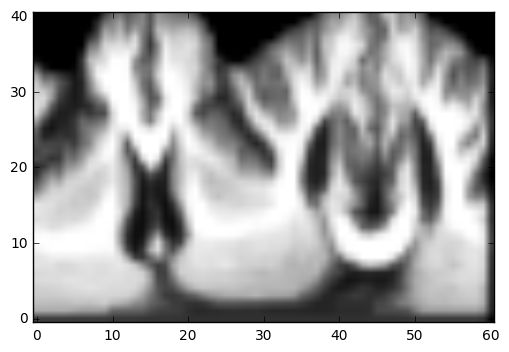

29.6


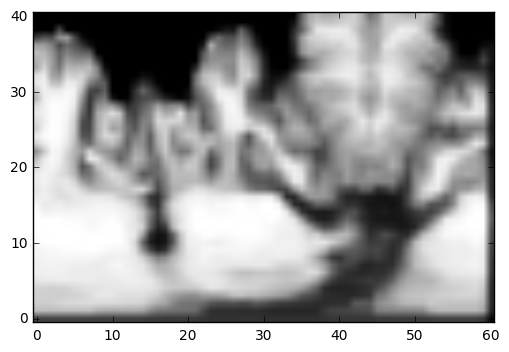

37.0


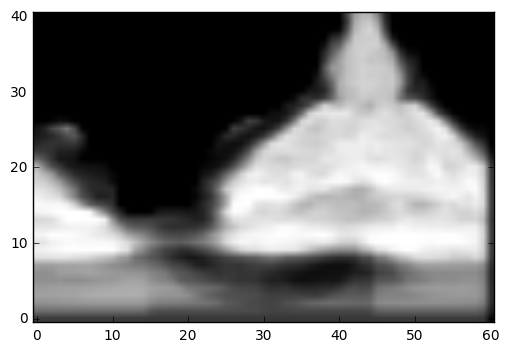

In [96]:
if True:
  i = 218
  for it,theta in enumerate(np.linspace(0,xSmaller[i].shape[1]-1,6)):
    print theta
    c = equalize_hist(np.array(xSmaller[i,:,theta,:],copy=True),5)
    plt.imshow(c, cmap="gray", origin="lower")
    plt.show()

Flat structure: (416, 283556)
[ 18.44077714   6.90442668   4.59054256   3.87530215   2.89678002
   2.45818383   2.32474354   2.0352374    1.88261397   1.81105382
   1.61478046   1.52935882   1.51247985   1.43985828   1.38582512] ... [ 0.97923552  0.97220098  0.9662092 ]


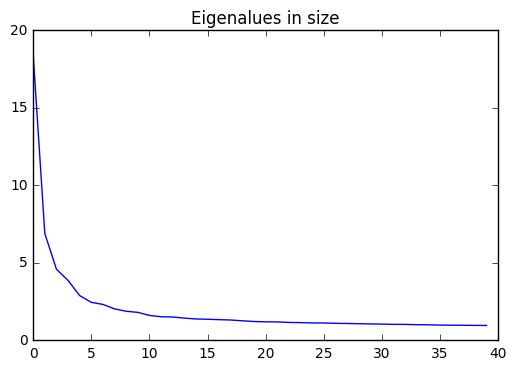

In [71]:
print "Flat structure:",xFlat.shape
kpca = KernelPCA(kernel="rbf",degree=2,coef0=1,gamma=1e-10,random_state=0,n_components=40,fit_inverse_transform=True)
xtransformed = kpca.fit_transform(xFlat[:n_max,:])

print kpca.lambdas_[:15],"...",kpca.lambdas_[-3:]
plt.plot(kpca.lambdas_)
#plt.yscale('log')
plt.title("Eigenalues in size")
plt.show()

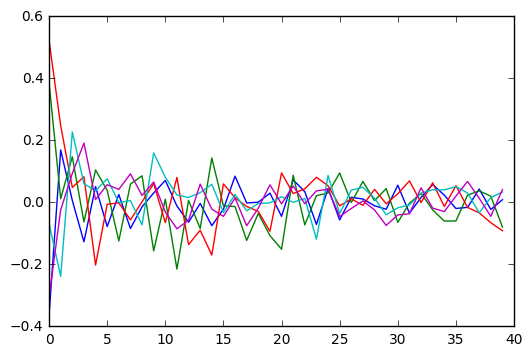

0.0


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


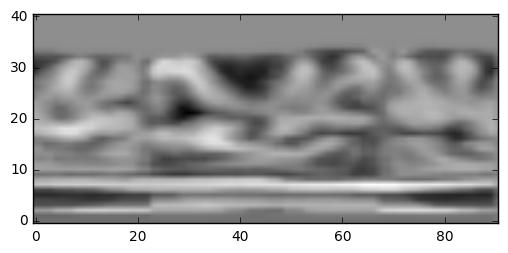

7.4


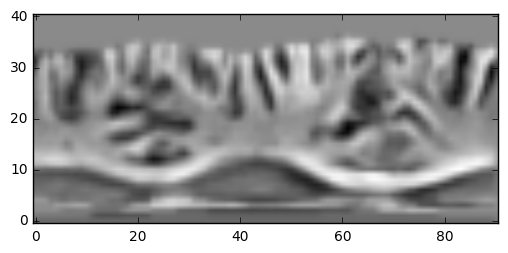

14.8


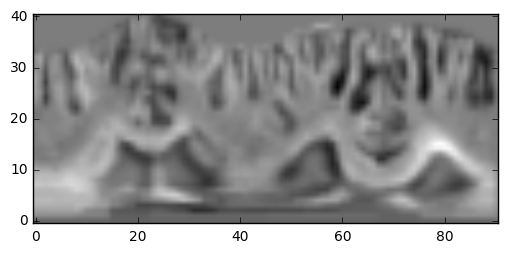

22.2


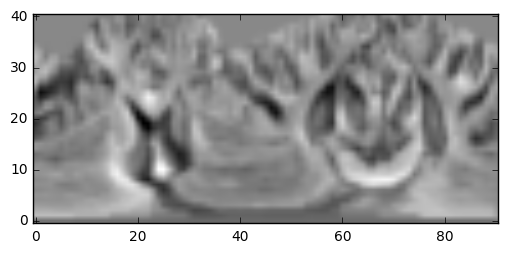

29.6


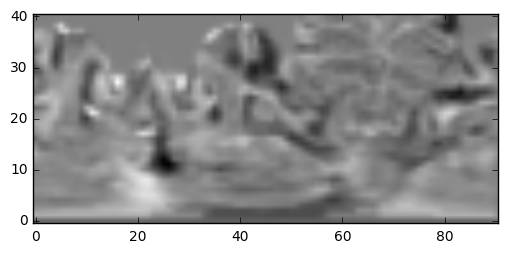

37.0


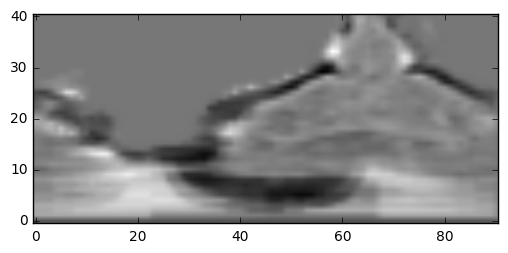

In [22]:
for i in xrange(5):
  j = i*3
  plt.plot(xtransformed[j])
plt.show()

if True:
  i = 218
  c = kpca.dual_coef_[i,:].reshape((41, 38, 91))
  for it,theta in enumerate(np.linspace(0,xSmaller[i].shape[1]-1,6)):
    print theta
    d = c[:,theta,:]
    plt.imshow(d, cmap="gray", origin="lower")
    plt.show()